## Model Building and Validation

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
import os
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [70]:
#Retrieving stored dataframe 
%store -r df_dummies

In [71]:
#Dropping all functionally categorical variables from X

X = df_dummies.drop(['Heating Load', 'Glazing Area', 'Orientation of 3', 'Orientation of 4', 'Orientation of 5', 
                     'Glazing Area Distribution of 1', 'Glazing Area Distribution of 2', 'Glazing Area Distribution of 3',
                     'Glazing Area Distribution of 4', 'Glazing Area Distribution of 5', "Height of 3.5", "Height of 7"], axis = 1)
y = df_dummies['Heating Load']


We are dropping features in X that we will not be utilizing for our model. Our X variables need to consist of continuous variables for linear regression model. Our target variable is Heating Load. 

In [72]:
#Train, test, split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 37)

Training data is used to teach our model relationships and patterns, while splitting our data into training/validation will help us assess model's performance on unseen data. Testing data will be used to measure how well our model generalizes real-world information. Twenty-five percent of our dataset will be used for testing, while seventy-five percent of our data will be used for training our model. Train/test/split will allow us to build models to make predictions on unfamiliar datasets. 

In [73]:
#Fitting our linear regression training model
lin_regress = LinearRegression()
lin_regress.fit(X_train, y_train)

LinearRegression()

In [74]:
#Model Success Rate
pred = lin_regress.predict(X_test)
r2_score(y_test, pred)

0.8190345863688555

R-squared measures the goodness of fit of our linear regression model. This value measures how well our regression line estimates actual data. A higher R-squared value suggests that our X variables better explain the variation in our output data. Our R-squared value of 0.86 suggests that 86% of the variation in our output can be explained by our X values.

In [75]:
#Mean Squared Error
mean_sq_er = mean_squared_error(y_test, pred)
mean_sq_er

18.377609205239292

Mean Squared Error (MSE) takes the squared differences from the from the actual data points and predicted points. A lower MSE suggests better model performance. An MSE of 0 would suggest that a model perfectly aligns with the actual values (which is unrealistic in real world scenarios). We have a MSE of 15.23, which suggests a moderate level of error relative to scale of Heating Load (values ranging as low as 5 and as high as 43). 

In [76]:
#Model output
output = pd.DataFrame({"Actual Heating Load": y_test, "Predicted Heating Load": pred})
output.head()

,Actual Heating Load,Predicted Heating Load
369,12.87,12.854905
491,29.39,29.293599
65,37.12,32.586316
269,10.70,12.227800
432,28.70,27.883817


The table above provides us with a snippet our our actual vs predicted Heating Load Values. In row 369, the model does a very good job at predicting the actual Heating Load value. On the other hand, row 65 shows how our model's predicted Heating Load value was far from the actual Heating Load value. Based on this table, our model provides with us with reasonably close predictions. It is important to take into consideration our model's R-squared value and MSE in determining our model's overall effectiveness. 

In [77]:
#Printing shape 
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (576, 5)
y_train shape: (576,)
X_test shape: (192, 5)
y_test shape: (192,)


(0.0, 50.0)

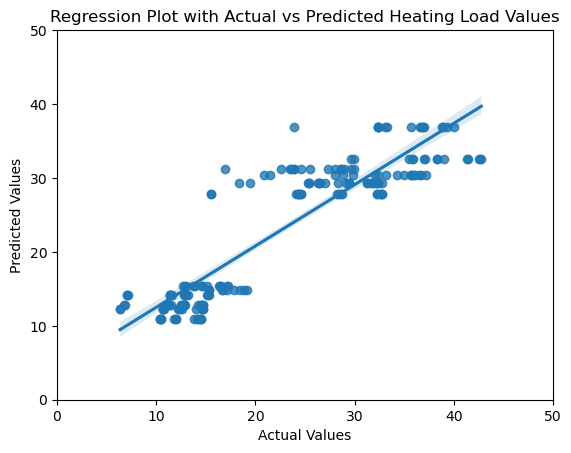

In [78]:
#Plotting Actual vs Predited Heating Load Values
sns.regplot(x = y_test, y = pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Regression Plot with Actual vs Predicted Heating Load Values")
plt.xlim(0, 50)
plt.ylim(0, 50)


The graph above displays our predicted Heating Load values and actual Heating Load values. By looking at this graph, you can see that some of our predicted values overestimated our actual values (e.g.: Predicted Heating Load of 11 vs Actual Heating Load of 5). In other instances our model underestimates our actual values (e.g.: Predicted Heating Load of 30 vs Actual Heating Load of 42.) Our model is able to closely predict some of our actual values (e.g.: Predicted Heating Load of 15 and Actual Heating Load of 15). Again, our R-Squared value and MSE adds additional context to this graph. 

## Modeling Recap

In this section, we followed systematic approach to prepare and assess our linear regression model for Heating Load. We utilized continous variables for our model to predict Heating Load, while excluding variables that acted as categorical variables. Our training process involved a 75/25 split, allowing us to teach our model about a sizable portion of dataset, while giving it room to evaluating generalizations on unseen data. We received an R-squared value of 0.86, indicating that about 86% of variation in our output can be explained by our X variables. However, our model's performance yielded an MSE value of 15.23, indicating a moderate level of error in relation to our target variable. Looking at our model's sample table and scatterplot (of predicted vs actual values), we can see that our model sometimes overestimates and underestimates our actual values, emphasizing the need for additional refinement to better understand and predict our target variable. 